<a href="https://colab.research.google.com/github/sam-thurman/asl_alphabet_image_classification/blob/master/model_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
from skimage.segmentation import mark_boundaries
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
import pandas as pd
import numpy as np
import scipy as math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import lime
import lime.lime_image

from sklearn.model_selection import train_test_split
import keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Model, Sequential
from keras import layers
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras import optimizers
from keras.optimizers import Adam
from keras.models import load_model

import tensorflow as tf

import sys
import os


Notebook running: keras  2.3.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [2]:
warnings.filterwarnings('ignore')
model_path= 'asl_alphabet_image_classification/models/'
model3 = load_model(os.path.join('../models/copy_model3.h5'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


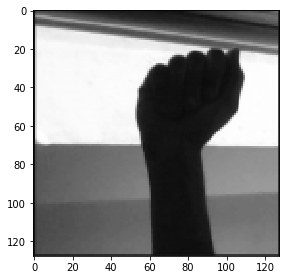

In [10]:
data_path = '../data/asl_alphabet_validation/'
Xi = skimage.io.imread(os.path.join(data_path, 'A/A_test.jpg'))
from skimage.color import rgb2gray
Xi = rgb2gray(Xi)
Xi = skimage.transform.resize(Xi, (128,128)) 
Xi = (Xi - 0.5)*2 
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

In [68]:

Xi.shape

(128, 128)

In [18]:
np.expand_dims(Xi, axis=2).shape

(128, 128, 1)

In [69]:
def predict(image):
#     print(image.shape)
    image_keras = np.expand_dims(image, axis=3)
#     print(image_keras.shape)
    image_keras = image_keras[:,:,:,:,0]
#     print(image_keras.shape)
#     return
    return model3.predict(image_keras)

In [70]:
explainer = lime.lime_image.LimeImageExplainer()

In [71]:
explanation = explainer.explain_instance(Xi, predict, batch_size=1)

In [76]:
explanation.top_labels

[0, 4, 6, 27, 23]

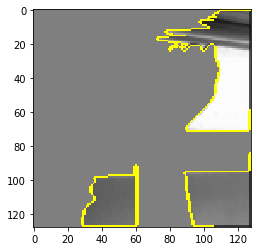

In [80]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [27]:
train_path = 'data/asl_alphabet_train'
validation_path = 'data/asl_alphabet_validation'
sam_path = 'data/asl_extra_val'
image_size = 128
batch_size = 32
valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
val_generator = valgen.flow_from_directory(
                validation_path,  # directory for validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical',
                color_mode='grayscale',
                shuffle=False)

samgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=(lambda x: tf.image.central_crop(x, central_fraction=1)))
sam_generator = samgen.flow_from_directory(
                sam_path,  # directory for me-made validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical',
                color_mode='grayscale',
                shuffle=False)

Found 30 images belonging to 29 classes.
Found 29 images belonging to 29 classes.
